In [2]:
#!pip install fastai2==0.0.17

In [1]:
from fastai2.basics import *
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 20)

#from fastai2.medical.imaging import *


import fastai2.medical.imaging as f2mi

In [2]:
main_dir=Path('/data/ievgen/LungeOSIC/data')

In [8]:

from natsort import natsorted

files=[]
for dirname, _, filenames in os.walk(main_dir):
    for filename in (filenames):
        files.append(os.path.join((dirname), filename))        
files=[x for x in files if '.csv' not in x]
files=natsorted(files)
train_images= [Path(x) for x in files if 'train'  in x]
test_images = [Path(x) for x in files if 'test'   in x]



In [9]:
#dcm_metadata_train=f2b.pd.DataFrame.from_dicoms(train_images,px_summ=True)
#dcm_metadata_test=f2b.pd.DataFrame.from_dicoms(test_images,px_summ=True)
#dcm_metadata_train.to_csv('dcm_metadata_train.csv',index=False)
#dcm_metadata_test.to_csv('dcm_metadata_test.csv',index=False)

In [10]:
dcm_metadata_train = pd.read_csv('dcm_metadata_train.csv')
dcm_metadata_test  = pd.read_csv('dcm_metadata_test.csv')

In [11]:
dcm_metadata_train

,SpecificCharacterSet,ImageType,SOPInstanceUID,Modality,Manufacturer,ManufacturerModelName,PatientName,PatientID,PatientSex,DeidentificationMethod,BodyPartExamined,SliceThickness,KVP,DistanceSourceToDetector,DistanceSourceToPatient,GantryDetectorTilt,TableHeight,RotationDirection,XRayTubeCurrent,GeneratorPower,FocalSpots,ConvolutionKernel,PatientPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,InstanceNumber,ImagePositionPatient,ImageOrientationPatient,FrameOfReferenceUID,PositionReferenceIndicator,SliceLocation,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,PixelPaddingValue,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,RescaleType,fname,MultiImageType,ImageType1,ImageType2,MultiImagePositionPatient,ImagePositionPatient1,ImagePositionPatient2,MultiImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window,MultiSpecificCharacterSet,SpecificCharacterSet1,ImageType3,SmallestImagePixelValue,LargestImagePixelValue,WindowCenterWidthExplanation,MultiWindowCenterWidthExplanation,WindowCenterWidthExplanation1,MultiWindowCenter,WindowCenter1,MultiWindowWidth,WindowWidth1,PatientOrientation,MultiFocalSpots,FocalSpots1,MultiPatientOrientation,PatientOrientation1,RevolutionTime,SingleCollimationWidth,TotalCollimationWidth,TableSpeed,TableFeedPerRotation,SpiralPitchFactor,SpacingBetweenSlices,ImageType4,ImageType5,ImageType6,ImageType7,ImageType8,SpatialResolution,MultiConvolutionKernel,ConvolutionKernel1
0,ISO_IR 100,ORIGINAL,2.25.12297650151329871895440507938349160734,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,NaN,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79.0,9600.0,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,NaN,1,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-69.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000.0,-500.0,-1500.0,-1024.0,1.0,HU,/data/ievgen/LungeOSIC/data/train/ID00007637202177411956430/1.dcm,1.0,PRIMARY,AXIAL,1.0,-153.5,-69.750000,1.0,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,2842,-1.454884,1137.488858,0.058094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISO_IR 100,ORIGINAL,2.25.107800119032107514066474993240517588402,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,NaN,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79.0,9600.0,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,NaN,2,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-79.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000.0,-500.0,-1500.0,-1024.0,1.0,HU,/data/ievgen/LungeOSIC/data/train/ID00007637202177411956430/2.dcm,1.0,PRIMARY,AXIAL,1.0,-153.5,-79.750000,1.0,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,3055,45.200184,1162.067874,0.062855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ISO_IR 100,ORIGINAL,2.25.28852521435320092114433165704413470749,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,NaN,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79.0,9600.0,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,NaN,3,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-89.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000.0,-500.0,-1500.0,-1024.0,1.0,HU,/data/ievgen/LungeOSIC/data/train/ID00007637202177411956430/3.dcm,1.0,PRIMARY,AXIAL,1.0,-153.5,-89.750000,1.0,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,3195,51.167198,1167.931894,0.061859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
dcm_metadata_train.drop_duplicates(subset=['PatientID'],keep='last').reset_index(drop=True)

,SpecificCharacterSet,ImageType,SOPInstanceUID,Modality,Manufacturer,ManufacturerModelName,PatientName,PatientID,PatientSex,DeidentificationMethod,BodyPartExamined,SliceThickness,KVP,DistanceSourceToDetector,DistanceSourceToPatient,GantryDetectorTilt,TableHeight,RotationDirection,XRayTubeCurrent,GeneratorPower,FocalSpots,ConvolutionKernel,PatientPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,InstanceNumber,ImagePositionPatient,ImageOrientationPatient,FrameOfReferenceUID,PositionReferenceIndicator,SliceLocation,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,PixelPaddingValue,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,RescaleType,fname,MultiImageType,ImageType1,ImageType2,MultiImagePositionPatient,ImagePositionPatient1,ImagePositionPatient2,MultiImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window,MultiSpecificCharacterSet,SpecificCharacterSet1,ImageType3,SmallestImagePixelValue,LargestImagePixelValue,WindowCenterWidthExplanation,MultiWindowCenterWidthExplanation,WindowCenterWidthExplanation1,MultiWindowCenter,WindowCenter1,MultiWindowWidth,WindowWidth1,PatientOrientation,MultiFocalSpots,FocalSpots1,MultiPatientOrientation,PatientOrientation1,RevolutionTime,SingleCollimationWidth,TotalCollimationWidth,TableSpeed,TableFeedPerRotation,SpiralPitchFactor,SpacingBetweenSlices,ImageType4,ImageType5,ImageType6,ImageType7,ImageType8,SpatialResolution,MultiConvolutionKernel,ConvolutionKernel1
0,ISO_IR 100,ORIGINAL,2.25.95516132172461492040664114239048418896,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,NaN,Table;,Chest,1.250,120.0,949.075012,541.0,0.0,130.0,CW,79.0,9600.0,0.70,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,NaN,30,-158.700000,1.0,2.25.64058019325784235774105718339367403144,SN,-359.750000,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000.0,-500.0,-1500.0,-1024.0,1.0,HU,/data/ievgen/LungeOSIC/data/train/ID00007637202177411956430/30.dcm,1.0,PRIMARY,AXIAL,1.0,-153.500000,-359.750000,1.0,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,3001,208.253490,1215.259107,0.074947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISO 2022 IR 100,DERIVED,1.2.276.0.7230010.3.1.4.0.37492.1591423153.182588,CT,SIEMENS,OsiriX,ID00009637202177434476278,ID00009637202177434476278,NaN,Table;,Chest,1.250,130.0,940.000000,535.0,0.0,147.0,CW,205.0,25.0,0.95,B50s,FFS,2.25.156962683457839326089809785890930019885,1.3.6.1.4.1.19291.2.1.2.11622117719213522261311595026142,NaN,394,-171.634766,1.0,2.25.43709796593718338529847979481714156908,NaN,-351.399994,1,MONOCHROME2,768,768,0.486979,16,16,15,0,NaN,-500.0,1500.0,-1024.0,1.0,HU,/data/ievgen/LungeOSIC/data/train/ID00009637202177434476278/394.dcm,1.0,SECONDARY,AXIAL,1.0,-333.634766,-351.399994,1.0,0.0,0.0,0.0,1.0,0.0,1,0.486979,0,4112,749.342965,508.123130,0.071526,1.0,ISO 2022 IR 100,CT_SOM5 SPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,ORIGINAL,2.25.128419393101789806562101388305821115877,CT,SIEMENS,Sensation 16,ID00010637202177584971671,ID00010637202177584971671,NaN,Table;,Chest,2.000,120.0,1040.000000,570.0,0.0,147.0,CW,140.0,18.0,0.70,B70f,HFS,2.25.11726522219678615199208148726917028045,2.25.79441149943468688721626434287781165223,NaN,106,-169.172852,1.0,2.25.80966900874021010523295949085503466621,NaN,-1113.500000,1,MONOCHROME2,512,512,0.654297,16,12,11,0,NaN,-500.0,-1500.0,-1024.0,1.0,NaN,/data/ievgen/LungeOSIC/data/train/ID00010637202177584971671/106.dcm,1.0,PRIMARY,AXIAL,1.0,-314.172852,-1113.500000,1.0,0.0,0.0,0.0,1.0,0.0,1,0.654297,0,3031,615.953453,493.677633,0.107857,NaN,NaN,CT_SOM5 SPI,0.0,3031.0,W

In [13]:
meta=dcm_metadata_train.drop_duplicates(subset=['PatientID'],keep='last').reset_index(drop=True)
meta=meta[['PatientID','SliceThickness','InstanceNumber','Rows','Columns','PixelSpacing','BitsStored','fname','img_min','img_max', 'img_mean', 'img_std']]
meta.columns=['name','dz','nsls','nrows','ncols','dxy','BitsStored','fname','img_min','img_max', 'img_mean', 'img_std']


In [14]:
meta

,name,dz,nsls,nrows,ncols,dxy,BitsStored,fname,img_min,img_max,img_mean,img_std
0,ID00007637202177411956430,1.250,30,512,512,0.652344,16,/data/ievgen/LungeOSIC/data/train/ID00007637202177411956430/30.dcm,-2000,3001,208.253490,1215.259107
1,ID00009637202177434476278,1.250,394,768,768,0.486979,16,/data/ievgen/LungeOSIC/data/train/ID00009637202177434476278/394.dcm,0,4112,749.342965,508.123130
2,ID00010637202177584971671,2.000,106,512,512,0.654297,12,/data/ievgen/LungeOSIC/data/train/ID00010637202177584971671/106.dcm,0,3031,615.953453,493.677633
3,ID00011637202177653955184,1.000,31,512,512,0.580078,12,/data/ievgen/LungeOSIC/data/train/ID00011637202177653955184/31.dcm,0,0,0.000000,0.000000
4,ID00012637202177665765362,7.000,49,512,512,0.625000,16,/data/ievgen/LungeOSIC/data/train/ID00012637202177665765362/49.dcm,-2048,2446,-589.314571,848.210470
...,...,...,...,...,...,...,...,...,...,...,...,...
171,ID00419637202311204720264,1.250,28,1100,888,0.820312,16,/data/ievgen/LungeOSIC/data/train/ID00419637202311204720264/28.dcm,-3024,1811,-214.860049,721.495492
172,ID00421637202311550012437,1.000,62,768,768,0.415365,16,/data/ievgen/LungeOSIC/data/train/ID00421637202311550012437/62.dcm,0,2606,672.158607,462.625341
173,ID00422637202311677017371,0.625,473,512,512,0.664062,16,/data/ievgen/LungeOSIC/data/train/ID00422637202311677017371/473.dcm,-2000,3295,86.528824,1160.153308
174,ID00423637202312137826377,1.000,290,512,512,0.693359,12,/data/ievgen/LungeOSIC/data/train/ID00423637202312137826377/290.dcm,0,3349,694.903397,485.941626


In [15]:
meta.isna().sum()

name          0
dz            0
nsls          0
nrows         0
ncols         0
dxy           0
BitsStored    0
fname         0
img_min       0
img_max       0
img_mean      0
img_std       0
dtype: int64

(array([ 1.,  1.,  1.,  4.,  2.,  2.,  4., 13.,  7.,  3.,  4.,  7.,  0.,
         1.,  2.,  0.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  2.,
         2.,  2.,  1.,  2.,  2.,  1.,  0.,  1.,  3.,  0.,  0.,  2.,  0.,
         2.,  1.,  2.,  1.,  1.,  1.,  3.,  2.,  1.,  0.,  2.,  0.,  1.,
         1.,  4.,  3.,  0.,  2.,  2.,  1.,  1.,  0.,  7.,  0.,  0.,  1.,
         0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  2.,  1.,  1.,  0.,
         0.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.

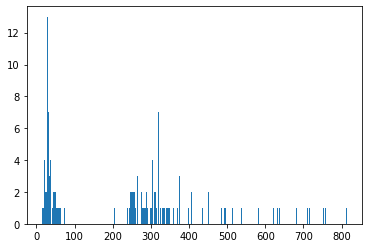

In [17]:
plt.hist(meta.dz*meta.nsls,bins=400)
#plt.gca().set_xlim(0,100)

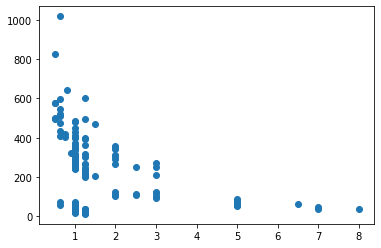

In [103]:
plt.scatter(meta.dz,meta.nsls)

In [20]:
meta[(meta.dz*meta.nsls>800)]

,name,dz,nsls,nrows,ncols,dxy,BitsStored,fname,img_min,img_max,img_mean,img_std
67,ID00140637202231728595149,3.0,271,512,512,0.740234,12,/data/ievgen/LungeOSIC/data/train/ID00140637202231728595149/271.dcm,0,3155,511.72538,491.688991
